# Prediction of credit card defaulters using machine learning

---
Data was sourced from [Kaggle](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset)   

Basic information of the features of the dataset:
- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (including individual and family/supplementary credit)
- SEX: Gender (1 = male, 2 = female)
- EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 4 = others, 5 = unknown, 6 = unknown)
- MARRIAGE: Marital status (1 = married, 2 = single, 3 = others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1 = pay duly, 1 = payment delay for one month, 2 = payment delay for two months, … 8 = payment delay for eight months, 9 = payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (same category options as PAY_0)
- PAY_3: Repayment status in July, 2005 (same category options as PAY_0)
- PAY_4: Repayment status in June, 2005 (same category options as PAY_0)
- PAY_5: Repayment status in May, 2005 (same category options as PAY_0)
- PAY_6: Repayment status in April, 2005 (same category options as PAY_0)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1 = yes, 0 = no)

## Load Dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
defaulters_data = pd.read_csv('data/credit_defaulters.csv')

In [3]:
#Having a quick look at the dataset
defaulters_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
defaulters_data.shape

(30000, 25)

This shows that the dataset has 30000 rows and 25 columns

## Data Cleaning & Preprocessing

In [5]:
# Checking for null values
defaulters_data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

Shows there are no empty values in the dataset

#### Checking for outliers in the dataset using boxplot

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

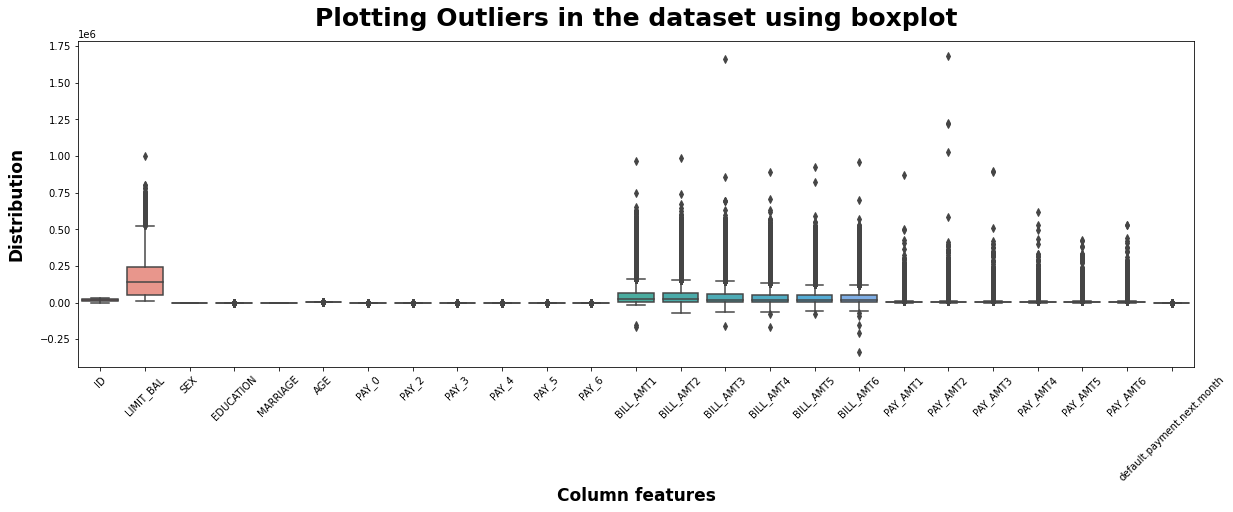

In [7]:
plt.figure(figsize = (20, 6))
sns.boxplot(data = defaulters_data)

plt.title('Plotting Outliers in the dataset using boxplot', weight = "bold", fontsize = 25, pad = 15)
plt.xlabel('Column features', weight = "bold", fontsize = 17)
plt.ylabel('Distribution', labelpad = 15, weight = "bold", fontsize = 17)

plt.xticks(rotation = 45);

This shows the presence of outliers in majority of the dataset such as the LIMIT_BAL, the BILL_AMTs and the PAY_AMTs column features

#### Removing the outliers using RobustScaler

In [8]:
from sklearn.preprocessing import RobustScaler

In [9]:
defaulters_data.iloc[:, -1]

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default.payment.next.month, Length: 30000, dtype: int64

In [10]:
#Limit the RobustScaler to be within 25 - 75 quantile range
robust_scaler = RobustScaler(quantile_range = (25.0, 75.0))

#Looking at the fact that we inted to use machine learning in this project, we can separate the data into input and output variable as at this point
input_data = defaulters_data.iloc[:, 1:-1] #Skipping the ID column and the target column
output_data = y = defaulters_data.iloc[:, -1]   #The last column which is the target variable -> default payment or not

#Perform the scaling on the input data
scaled_X = robust_scaler.fit_transform(input_data)

#Let's create a DataFrame showing the transformed data
scaled_X_df = pd.DataFrame(scaled_X, columns = input_data.columns)

In [11]:
#Display the scaled data
scaled_X_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-0.631579,0.0,0.0,-1.0,-0.769231,2.0,2.0,-1.0,-1.0,-2.0,...,-0.337391,-0.365126,-0.373848,-0.356074,-0.524214,-0.316775,-0.437424,-0.403524,-0.396930,-0.386374
1,-0.105263,0.0,0.0,0.0,-0.615385,-1.0,2.0,0.0,0.0,0.0,...,-0.302730,-0.302419,-0.302504,-0.288055,-0.524214,-0.242141,-0.194411,-0.134508,-0.396930,0.128791
2,-0.263158,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,-0.113559,-0.090477,-0.065180,-0.031747,-0.145282,-0.122150,-0.194411,-0.134508,-0.132310,0.901539
3,-0.473684,0.0,0.0,-1.0,0.230769,0.0,0.0,0.0,0.0,0.0,...,0.507883,0.177504,0.224139,0.260230,-0.024963,0.002400,-0.145808,-0.107606,-0.114051,-0.128791
4,-0.473684,-1.0,0.0,-1.0,1.769231,-1.0,0.0,-1.0,0.0,0.0,...,0.273859,0.036183,0.021506,0.042968,-0.024963,8.320614,1.992710,2.017621,-0.214607,-0.211475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.421053,-1.0,1.0,-1.0,0.384615,0.0,0.0,0.0,0.0,0.0,...,3.274459,1.321445,0.271179,-0.022757,1.597604,4.317495,0.778372,0.416168,0.926171,-0.128791
29996,0.052632,-1.0,1.0,0.0,0.692308,-1.0,-1.0,-1.0,-1.0,0.0,...,-0.288468,-0.193046,-0.266677,-0.356074,-0.065652,0.364051,1.749210,-0.368821,-0.396930,-0.386374
29997,-0.578947,-1.0,0.0,0.0,0.230769,4.0,3.0,2.0,-1.0,0.0,...,-0.301408,0.034995,0.051159,0.047682,-0.524214,-0.482121,4.908870,0.726343,0.132310,0.412132
29998,-0.315789,-1.0,1.0,-1.0,0.538462,1.0,-1.0,0.0,0.0,0.0,...,0.977686,0.646272,-0.129049,0.664821,20.918622,0.335973,-0.151154,0.114601,13.618418,0.078305


## Exploratory Data Analysis and Visualization

Taking a look at the distribution of the original dataset

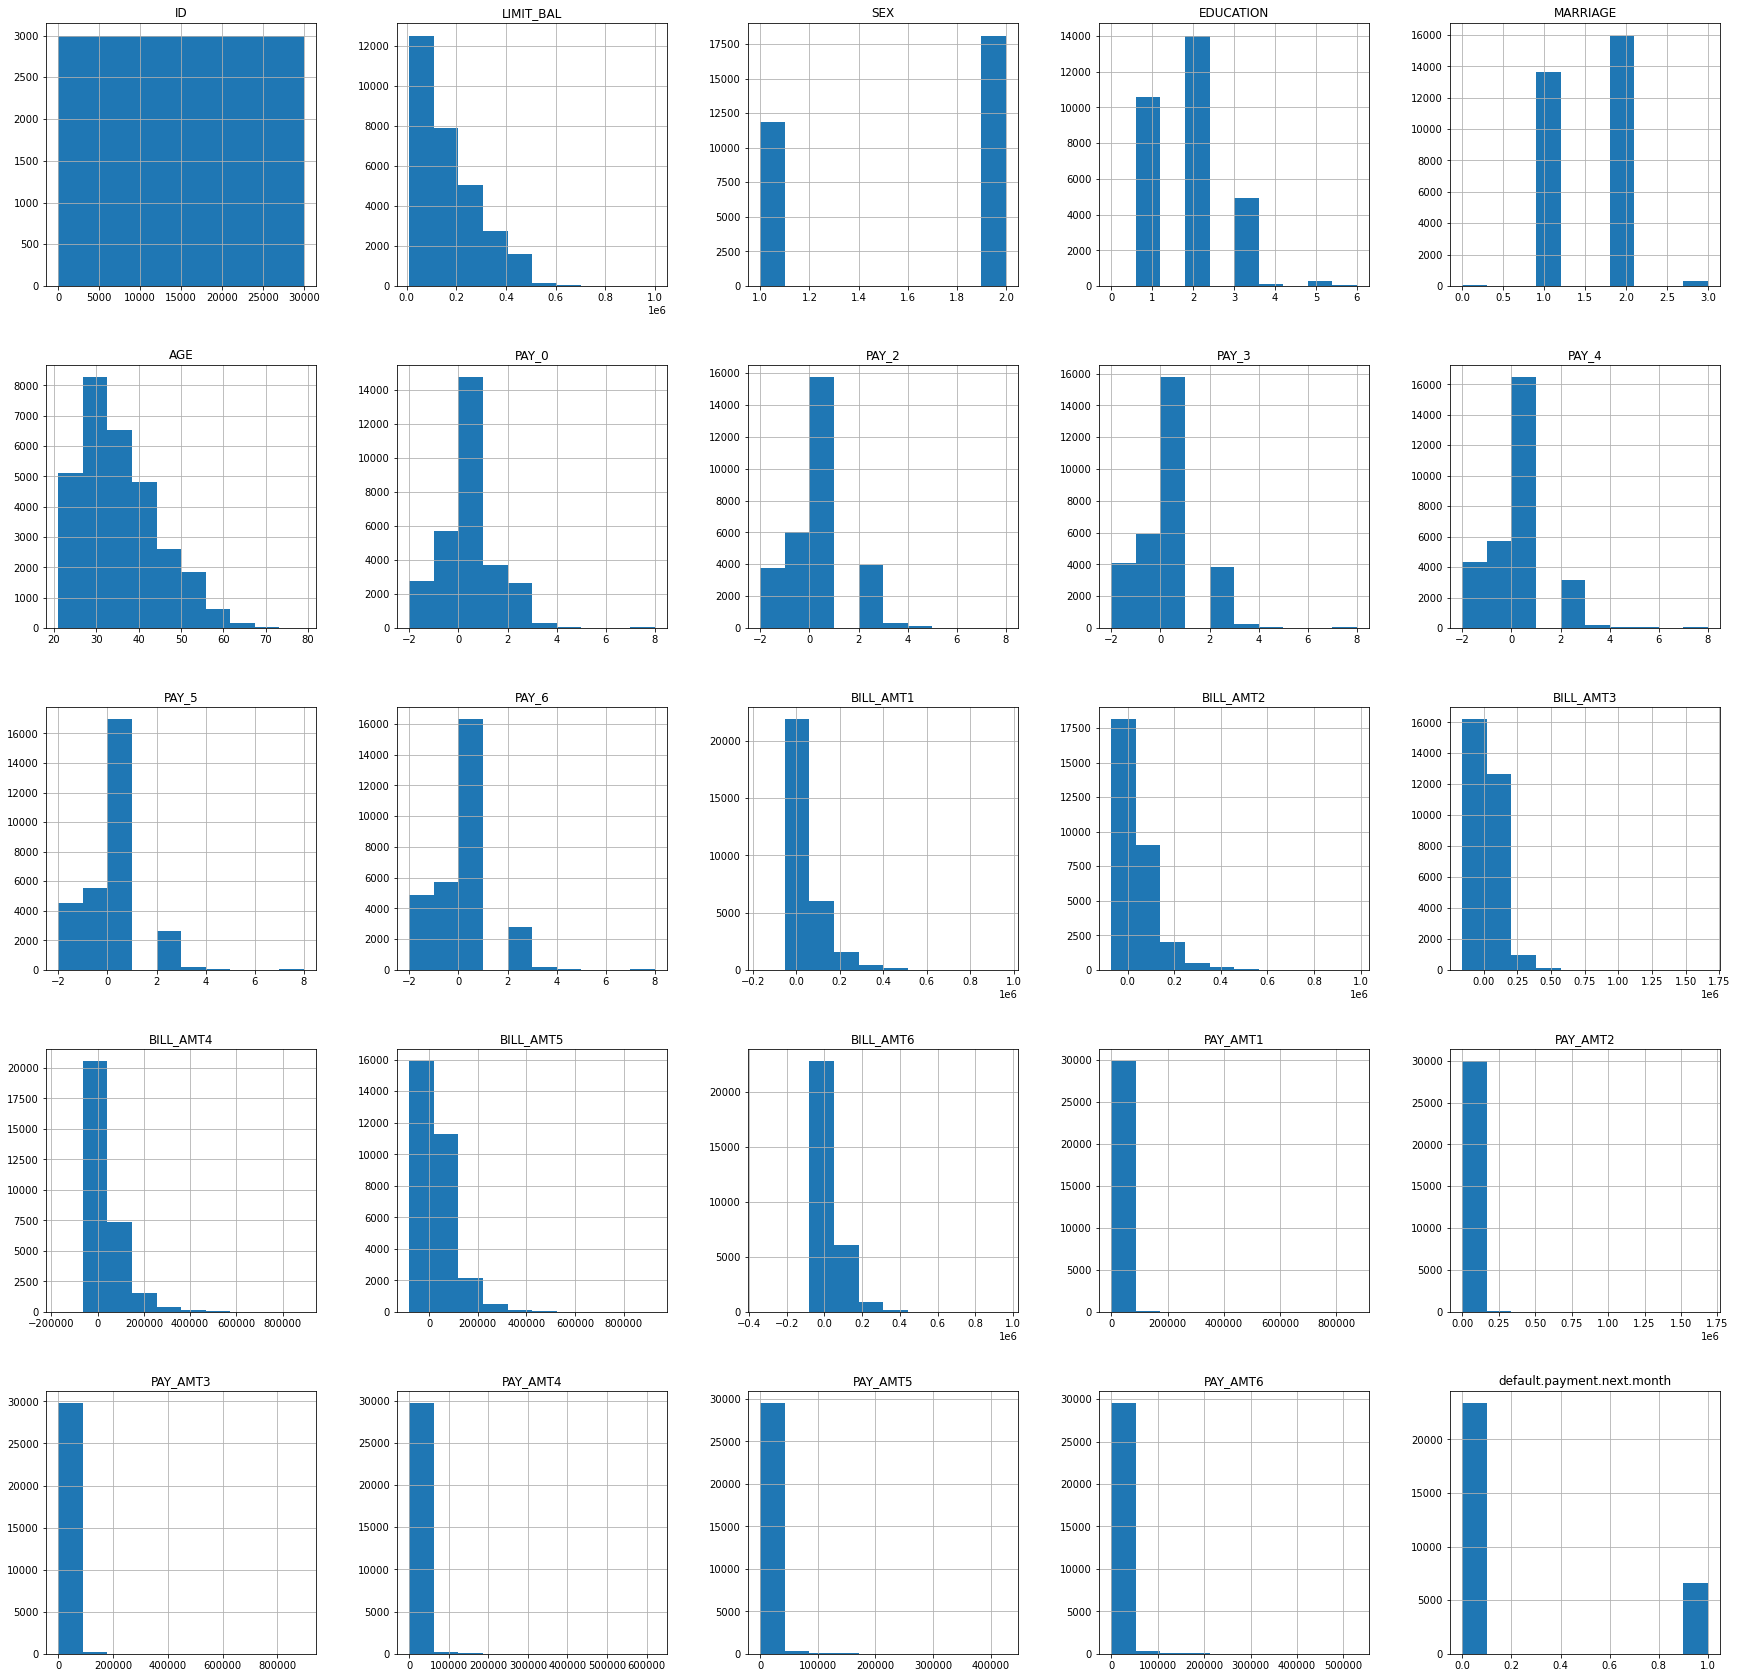

In [12]:
defaulters_data.hist(figsize = (30,30));

This gives an overall view at the individual features of the dataset such as:
> Females in the dataset are more than men   
> University students constitute the highest population in the dataset, followed by graduate school, and then high school   
> Married people were a bit higher than the singles   
> The age range was between 20 years to about 80 years old

## Model Buiding

We'll be using the scaled data which already had the outliers removed by picking the data values within the 25 - 75 quantile range.   

Another thing to note is that there are about 25 columns, we'll be using feature selection techniques to pick the columns that are most important in relationship to the output

#### Feature Selection

In [13]:
from sklearn.feature_selection import SelectKBest, f_classif

In [14]:
#Apply SelectKBest class to extract all the column features from most related to least related
no_of_columns = len(scaled_X_df.columns)
bestfeatures = SelectKBest(score_func = f_classif, k = no_of_columns)

fit = bestfeatures.fit(scaled_X_df, y)
scores_df = pd.DataFrame(fit.scores_)
columns_df = pd.DataFrame(scaled_X_df.columns)

scores_df_complete = pd.concat([columns_df, scores_df], axis = 1)
scores_df_complete.columns = ['Feature', 'Score']

print(scores_df_complete.nlargest(no_of_columns, 'Score'))   #Print the best features from best score to least

      Feature        Score
5       PAY_0  3537.714970
6       PAY_2  2239.169136
7       PAY_3  1757.466444
8       PAY_4  1476.845967
9       PAY_5  1304.591176
10      PAY_6  1085.402485
0   LIMIT_BAL   724.068539
17   PAY_AMT1   160.403810
18   PAY_AMT2   103.291524
20   PAY_AMT4    97.188000
19   PAY_AMT3    95.218011
21   PAY_AMT5    91.429801
22   PAY_AMT6    85.089045
1         SEX    47.978854
2   EDUCATION    23.547112
3    MARRIAGE    17.781271
11  BILL_AMT1    11.580532
12  BILL_AMT2     6.044238
13  BILL_AMT3     5.944388
4         AGE     5.788556
14  BILL_AMT4     3.094745
15  BILL_AMT5     1.371087
16  BILL_AMT6     0.865820


As expected, the most important columns are the repayment status columns (PAY_number).   
This shows that sex, education, age, marriage and other remaining columns are not very much related to whether a customer will default on credit cards payment or not

#### Let's perform correlation analysis to further confirm the above statement

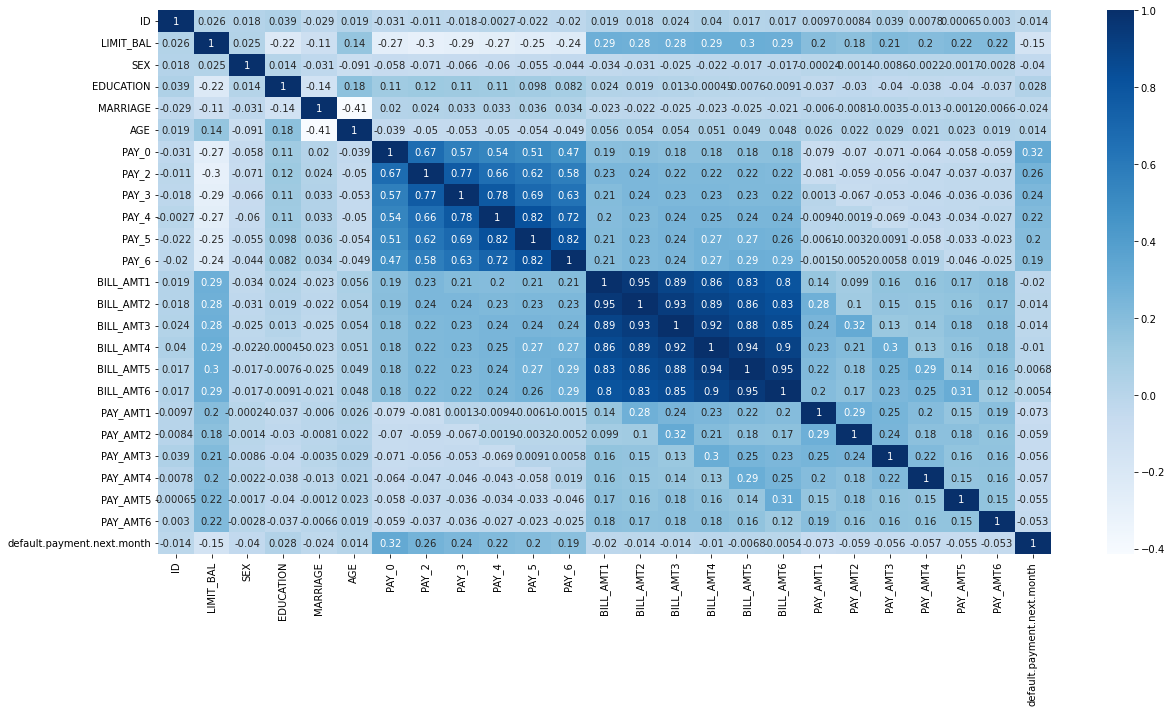

In [15]:
plt.figure(figsize = (20, 10))

sns.heatmap(defaulters_data.corr(), cmap = 'Blues', annot = True);

The heatmap above further proves that the most important columns are the repayment status columns. So, we can select these columns and drop other remaining columns since they don't have that much a relationship with the default on payment or not

In [16]:
scaled_data_selected = scaled_X_df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

scaled_data_selected.head()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2.0,2.0,-1.0,-1.0,-2.0,-2.0
1,-1.0,2.0,0.0,0.0,0.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.0,0.0,-1.0,0.0,0.0,0.0


#### Actual Model Building

For this project, we'll be using these models for the classification:
- LogisticRegression, 
- K-Nearest Neighbors, 
- Support Vector Machines, 
- RandomForestClassifier, 
- Multi-Layer Perceptron (Neural Network) and
- xgboost

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold

from sklearn.metrics import accuracy_score

In [18]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data_selected, y, test_size = 0.3, random_state = 42)

In [19]:
#Let's take a look if the training dataset is balanced regarding the output variable or not
y_train.value_counts()

0    16324
1     4676
Name: default.payment.next.month, dtype: int64

This shows how imbalanced the training set is. An approach to fix this is to balance the dataset to have the same number of values for each category

In [20]:
from imblearn.datasets import make_imbalance

In [21]:
#Balance the training dataset by making the value counts of the output variable to be exactly 4500
X_train_new, y_train_new = make_imbalance(X_train, y_train, sampling_strategy = {0: 4500, 1: 4500}, random_state = 42)

In [22]:
y_train_new.value_counts()

0    4500
1    4500
Name: default.payment.next.month, dtype: int64

We can observe that the training dataset is now balanced, we can pass them for model training

In [23]:
models = [LogisticRegression, KNeighborsClassifier, SVC, RandomForestClassifier, MLPClassifier, XGBClassifier]
loaded_models = []

for model in models:
    current_model = model()
    
    #Fit the model to the training set
    current_model.fit(X_train_new, y_train_new)
    loaded_models.append(current_model)   #Store a reference to the model been run
    
    y_pred = current_model.predict(X_test)
    
    score = accuracy_score(y_test, y_pred)
    
    model_name = type(current_model).__name__
    
    print(model_name, ' : ', round(score, 2))

LogisticRegression  :  0.77
KNeighborsClassifier  :  0.79
SVC  :  0.76
RandomForestClassifier  :  0.75
MLPClassifier  :  0.75
XGBClassifier  :  0.76


In [24]:
"""
param_grid = dict(solver = ['newton-cg', 'lbfgs', 'liblinear'], penalty = ['l2'], C = [100, 10, 1.0, 0.1, 0.01])
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 42)

grid_search = GridSearchCV(estimator = LogisticRegression(), param_grid = param_grid, n_jobs = -1, cv = cv, scoring = 'accuracy', error_score = 0)

grid_output = grid_search.fit(X_train_new, y_train_new)

best_model = grid_output.best_estimator_

y_pred = best_model.predict(X_test)

print(round(accuracy_score(y_test, y_pred), 2))
#0.77
""";

In [25]:
"""
param_grid = dict(n_neighbors = range(1, 21, 2), weights = ['uniform', 'distance'], metric = ['euclidean', 'manhattan', 'minkowski'])
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 42)


grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = param_grid, n_jobs = -1, cv = cv, scoring = 'accuracy', error_score = 0)

grid_output = grid_search.fit(X_train_new, y_train_new)

best_model = grid_output.best_estimator_

y_pred = best_model.predict(X_test)

print(round(accuracy_score(y_test, y_pred), 2))
#0.78
""";

In [26]:
"""
param_grid = dict(kernel = ['linear', 'poly', 'rbf', 'sigmoid'], C = [50, 10, 1.0, 0.1, 0.01], gamma = ['scale'])
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 42)


grid_search = GridSearchCV(estimator = SVC(), param_grid = param_grid, n_jobs = -1, cv = cv, scoring = 'accuracy', error_score = 0)

grid_output = grid_search.fit(X_train_new, y_train_new)

best_model = grid_output.best_estimator_

y_pred = best_model.predict(X_test)

print(round(accuracy_score(y_test, y_pred), 2))
#0.76
""";

Let's just pick one of the models and test the output against what's expected from the dataset

In [27]:
#Picking a datapoint to test against
scaled_data_selected.iloc[260]

PAY_0    0.0
PAY_2    0.0
PAY_3    0.0
PAY_4    0.0
PAY_5    0.0
PAY_6    0.0
Name: 260, dtype: float64

In [47]:
expected_output = y.iloc[260]

#Testing the last loaded model(xgboost) to predict the output of a variation of the above datapoint
datapoint = [0, 0, -1, 0, 0, -1]

predicted_output = current_model.predict([datapoint], validate_features = False)

print('Expected output: ', expected_output)
print('Predicted output: ', predicted_output)

Expected output:  0
Predicted output:  [0]


This predicted output coincides with the above expected datapoint which is also 0.   

Testing on another datapoint

In [52]:
scaled_data_selected.iloc[410]

PAY_0    1.0
PAY_2    2.0
PAY_3    2.0
PAY_4    2.0
PAY_5    2.0
PAY_6    2.0
Name: 410, dtype: float64

In [54]:
expected_output = y.iloc[410]

#Testing the last loaded model(xgboost) to predict the output of a variation of the above datapoint
datapoint = [1, 2, 2, 2, 2, 4]

predicted_output = current_model.predict([datapoint], validate_features = False)

print('Expected output: ', expected_output)
print('Predicted output: ', predicted_output)

Expected output:  1
Predicted output:  [1]


This also coincides with the expected output for the datapoint

### Conclusion

After accessing the model performance and testing accurately on new datapoints, this models can be employed to predict credit card defaulters.   

An upgrade to the models used will be to tune the hyperparameters that better resonate with the training datapoints so as to increase the overall model performance.